#### basic imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score,f1_score

#### data acquisition

In [3]:
train_df = pd.read_csv('kdd_train.csv')
test_df = pd.read_csv('kdd_test.csv')
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [7]:
#checking for missing values
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
train_df.drop_duplicates(inplace=True)

#### converting the labels column into two-class

In [9]:
train_df['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [10]:
"""
1. Normal Activity
normal
2. Malicious Activities
Denial of Service (DoS) Attacks

neptune
teardrop
smurf
pod
land
Network Scanning and Probing

ipsweep
portsweep
nmap
satan
Unauthorized Access and Exploits

back
guess_passwd
ftp_write
imap
phf
loadmodule
perl
buffer_overflow
rootkit
Malware and Software Exploits

warezclient
warezmaster
multihop
spy"""

'\n1. Normal Activity\nnormal\n2. Malicious Activities\nDenial of Service (DoS) Attacks\n\nneptune\nteardrop\nsmurf\npod\nland\nNetwork Scanning and Probing\n\nipsweep\nportsweep\nnmap\nsatan\nUnauthorized Access and Exploits\n\nback\nguess_passwd\nftp_write\nimap\nphf\nloadmodule\nperl\nbuffer_overflow\nrootkit\nMalware and Software Exploits\n\nwarezclient\nwarezmaster\nmultihop\nspy'

In [11]:
## thus classifying as normal or attack
train_df['labels'] = train_df['labels'].apply(lambda x : "normal" if x=='normal' else "attack")
test_df['labels'] = test_df['labels'].apply(lambda x : "normal" if x=='normal' else "attack")

<Axes: xlabel='labels', ylabel='count'>

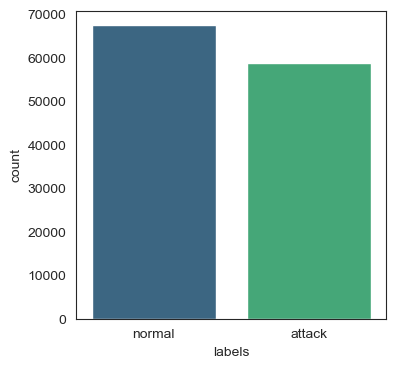

In [12]:
sns.set_style("white")
plt.figure(figsize=(4,4))
sns.countplot(x='labels',data=train_df,palette='viridis')

#### classifying columns into numerical and categorical and target

In [13]:
num_cols = ['duration','src_bytes','dst_bytes','hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files','count', 'srv_count', 'serror_rate',
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
           'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate',]
cat_cols = ['protocol_type','service','flag','land', 'wrong_fragment', 'urgent','logged_in','root_shell','su_attempted','num_shells','num_outbound_cmds','is_host_login','is_guest_login']
target = ['labels']

In [14]:
import matplotlib
matplotlib.use('Agg')

#### plotting histplots in 2 parts as for rendering

In [15]:
#hist for numerical columns
def plot_hist(df):
    #14
    num_cols =  ['duration','src_bytes','dst_bytes','hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files','count', 'srv_count', 'serror_rate',
           'srv_serror_rate', 'rerror_rate']
    num_plots = len(num_cols)
    num_rows = (num_plots+1)//3
    fig, axes = plt.subplots(nrows=num_rows,ncols=3,figsize=(20,5*num_rows))
    for i,col in enumerate(num_cols):
        row = i//3
        col_n = i%3
        ax = axes[row,col_n]
        sns.histplot(x=df[col],ax=ax,bins=35,kde=True,hue=df['labels'])
        ax.set_title(f"Boxplot of {col}")
        ax.set_xlabel(col)
    plt.tight_layout()    
    plt.show()

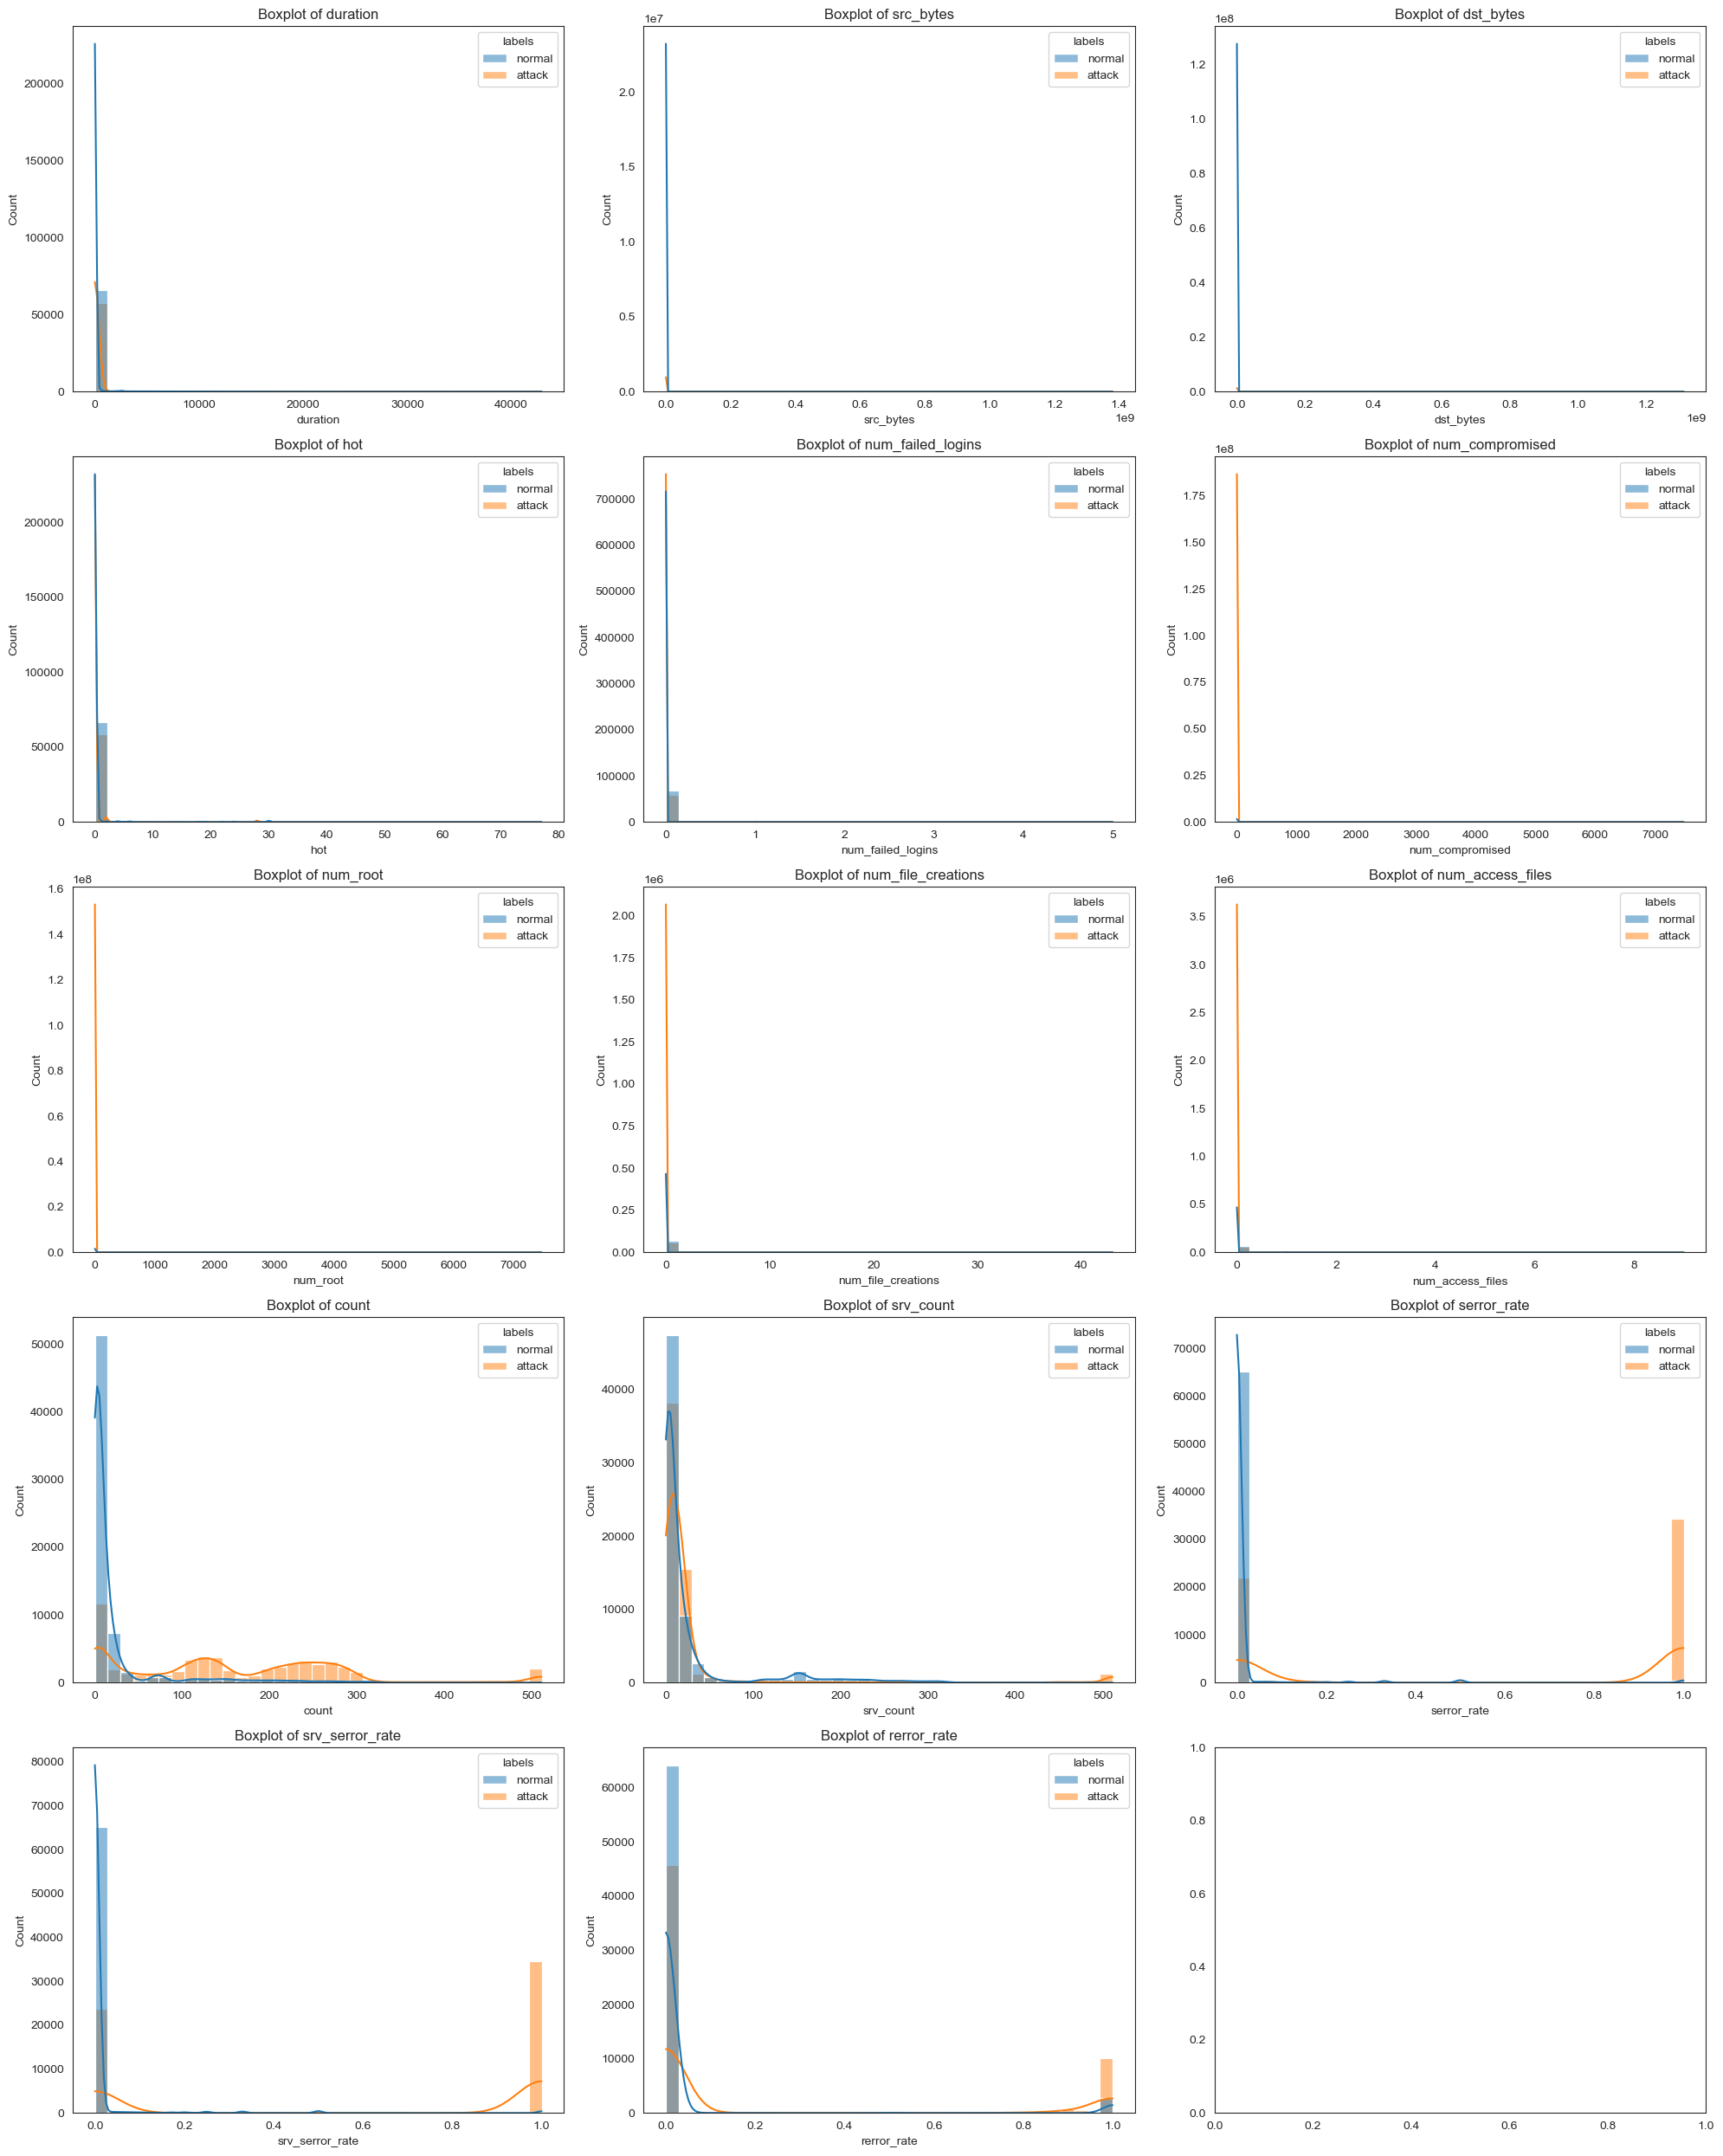

In [16]:
%matplotlib inline
plot_hist(train_df)

In [17]:
#hist for numerical columns
def plot_hist_2(df):
    num_cols =  ['srv_rerror_rate','dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate','same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
           'dst_host_srv_count']
    num_plots = len(num_cols)
    num_rows = (num_plots+1)//3
    fig, axes = plt.subplots(nrows=num_rows,ncols=3,figsize=(20,5*num_rows))
    for i,col in enumerate(num_cols):
        row = i//3
        col_n = i%3
        ax = axes[row,col_n]
        sns.histplot(x=df[col],ax=ax,bins=50,kde=True,hue=df['labels'])
        ax.set_title(f"Boxplot of {col}")
        ax.set_xlabel(col)
    plt.tight_layout()    
    plt.show()

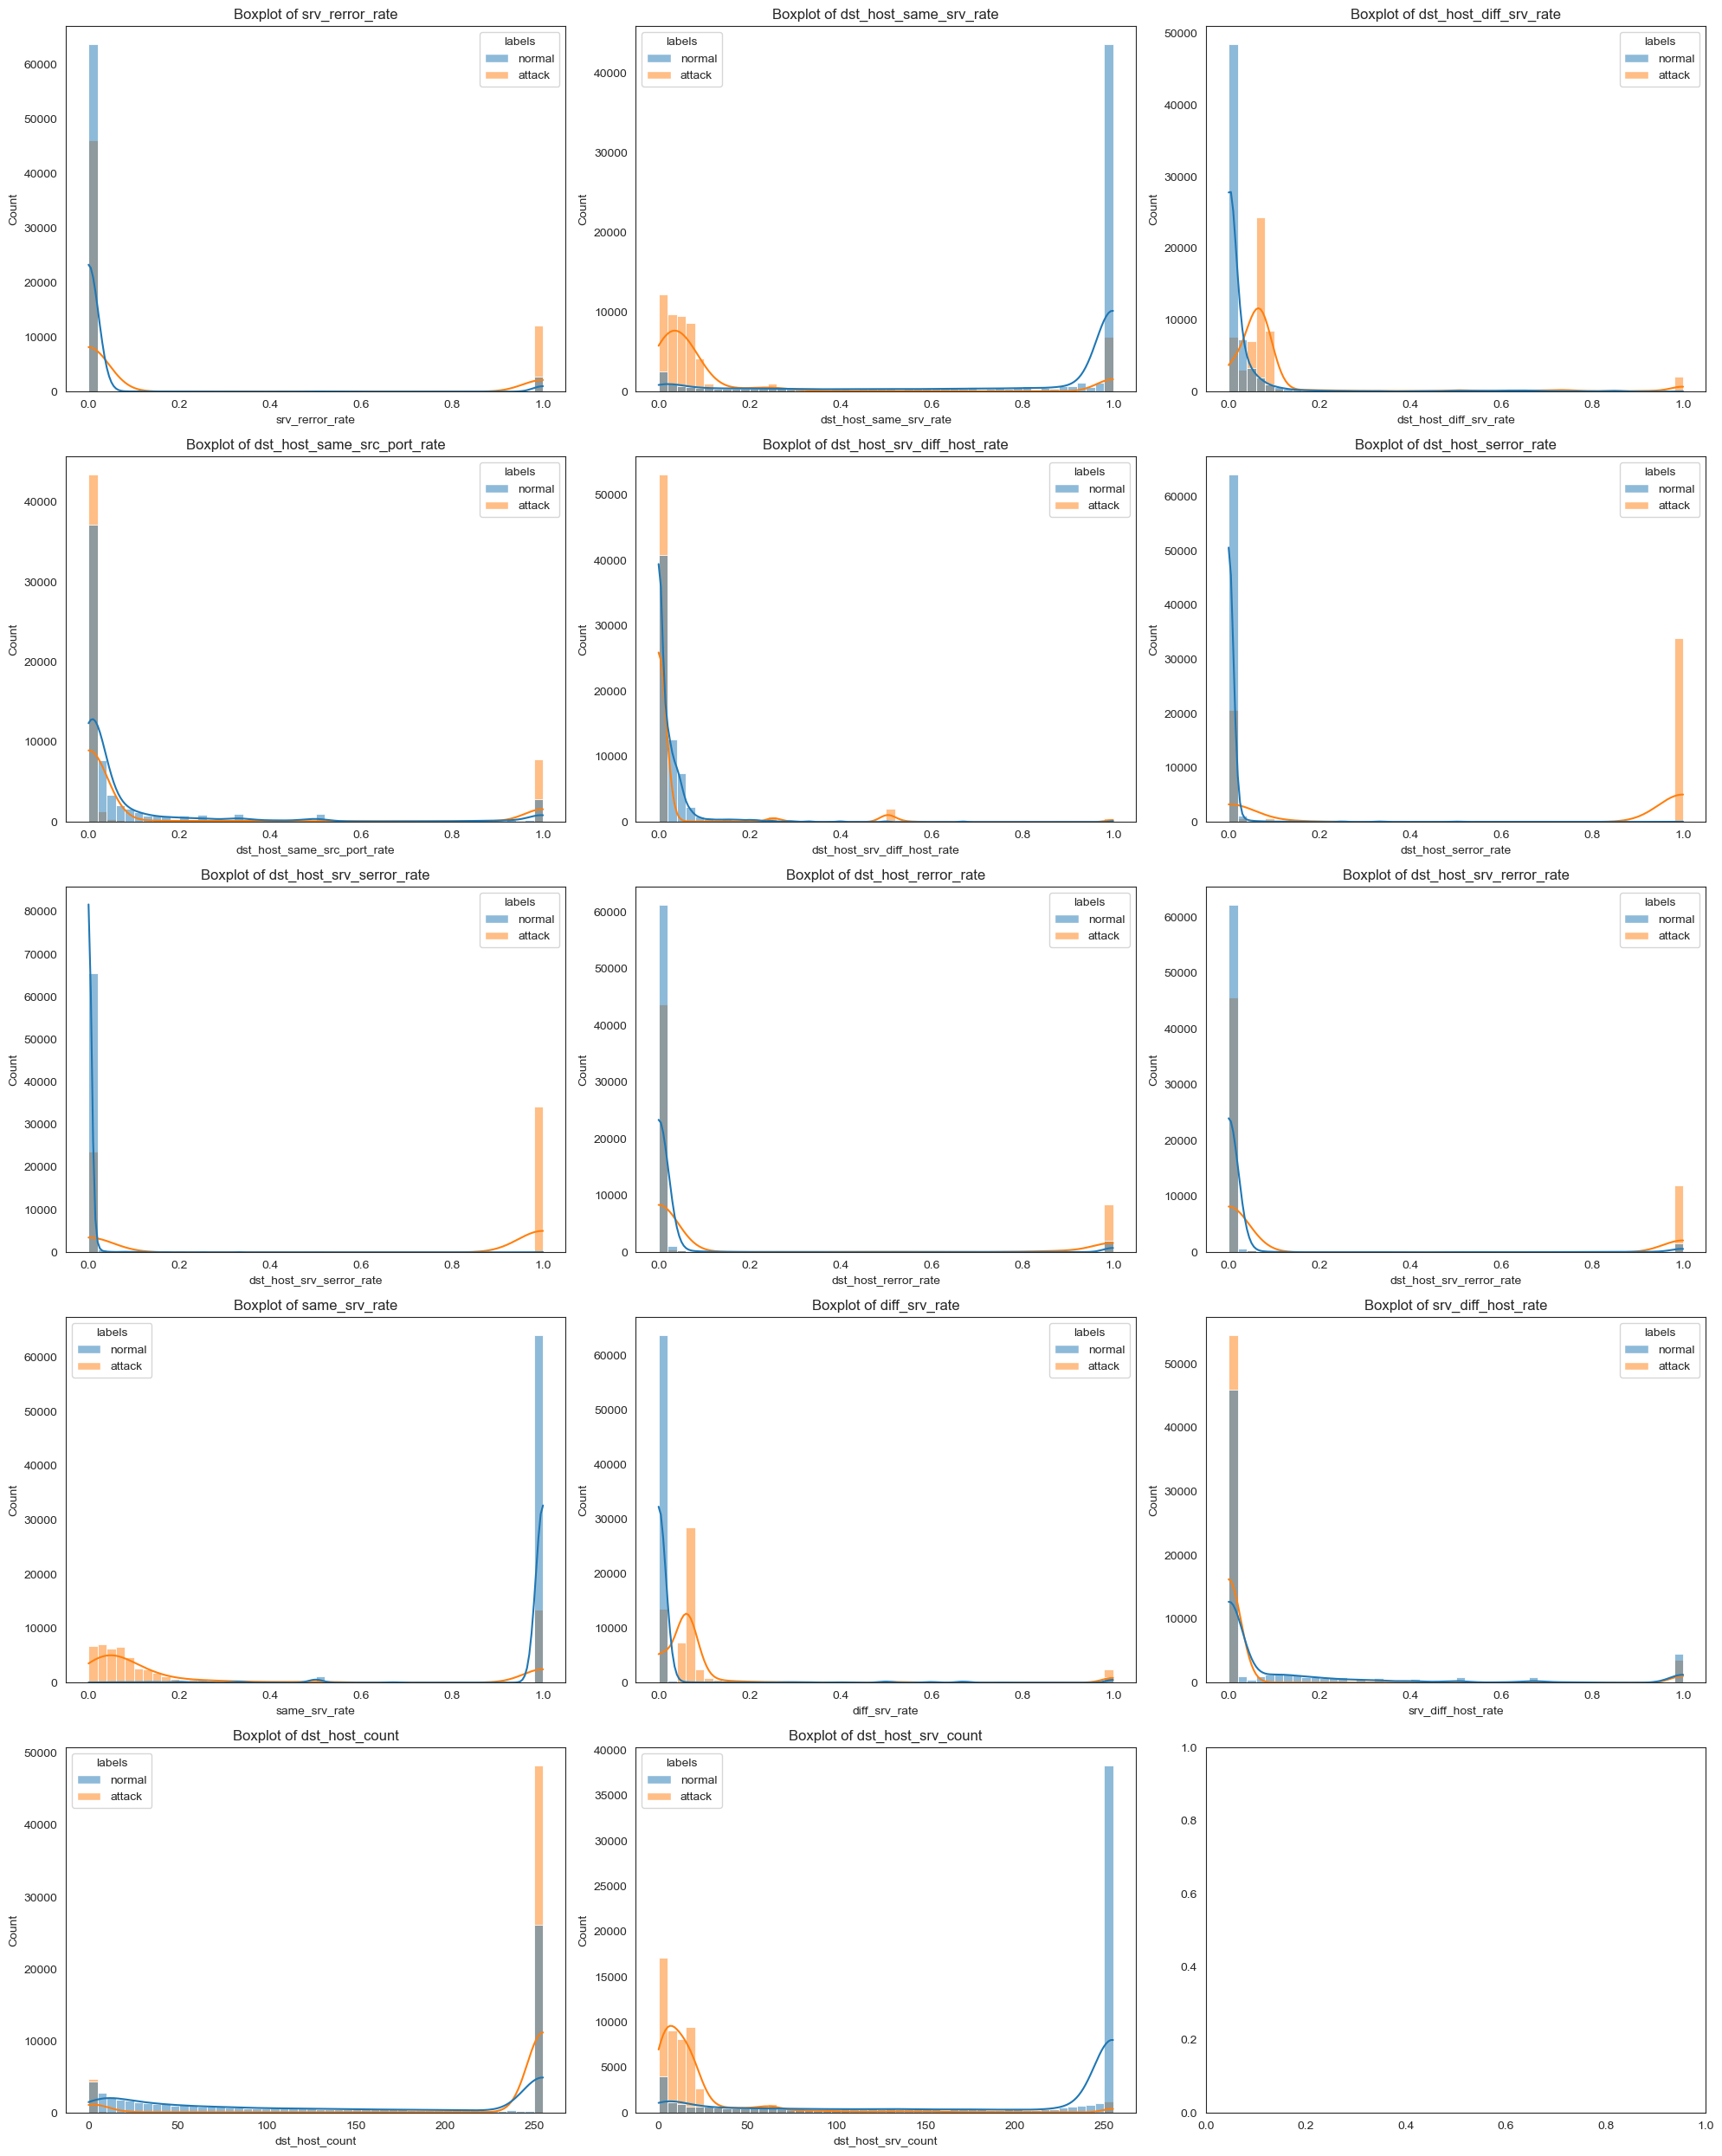

In [18]:
plot_hist_2(train_df)

#### countplots

In [19]:
#hist for numerical columns
def plot_count(df):
    cat_cols = ['protocol_type','flag','land', 'wrong_fragment', 'urgent','logged_in','root_shell','su_attempted','num_shells','num_outbound_cmds','is_host_login','is_guest_login']
    num_plots = len(cat_cols)
    num_rows = (num_plots+1)//3
    fig, axes = plt.subplots(nrows=num_rows,ncols=3,figsize=(16,5*num_rows))
    for i,col in enumerate(cat_cols):
        row = i//3
        col_n = i%3
        ax = axes[row,col_n]
        sns.countplot(x=df[col],ax=ax,hue=df['labels'],palette='viridis')
        ax.set_title(f"Countplot of {col}")
        ax.set_xlabel(col)
    plt.tight_layout()    
    plt.show()
    

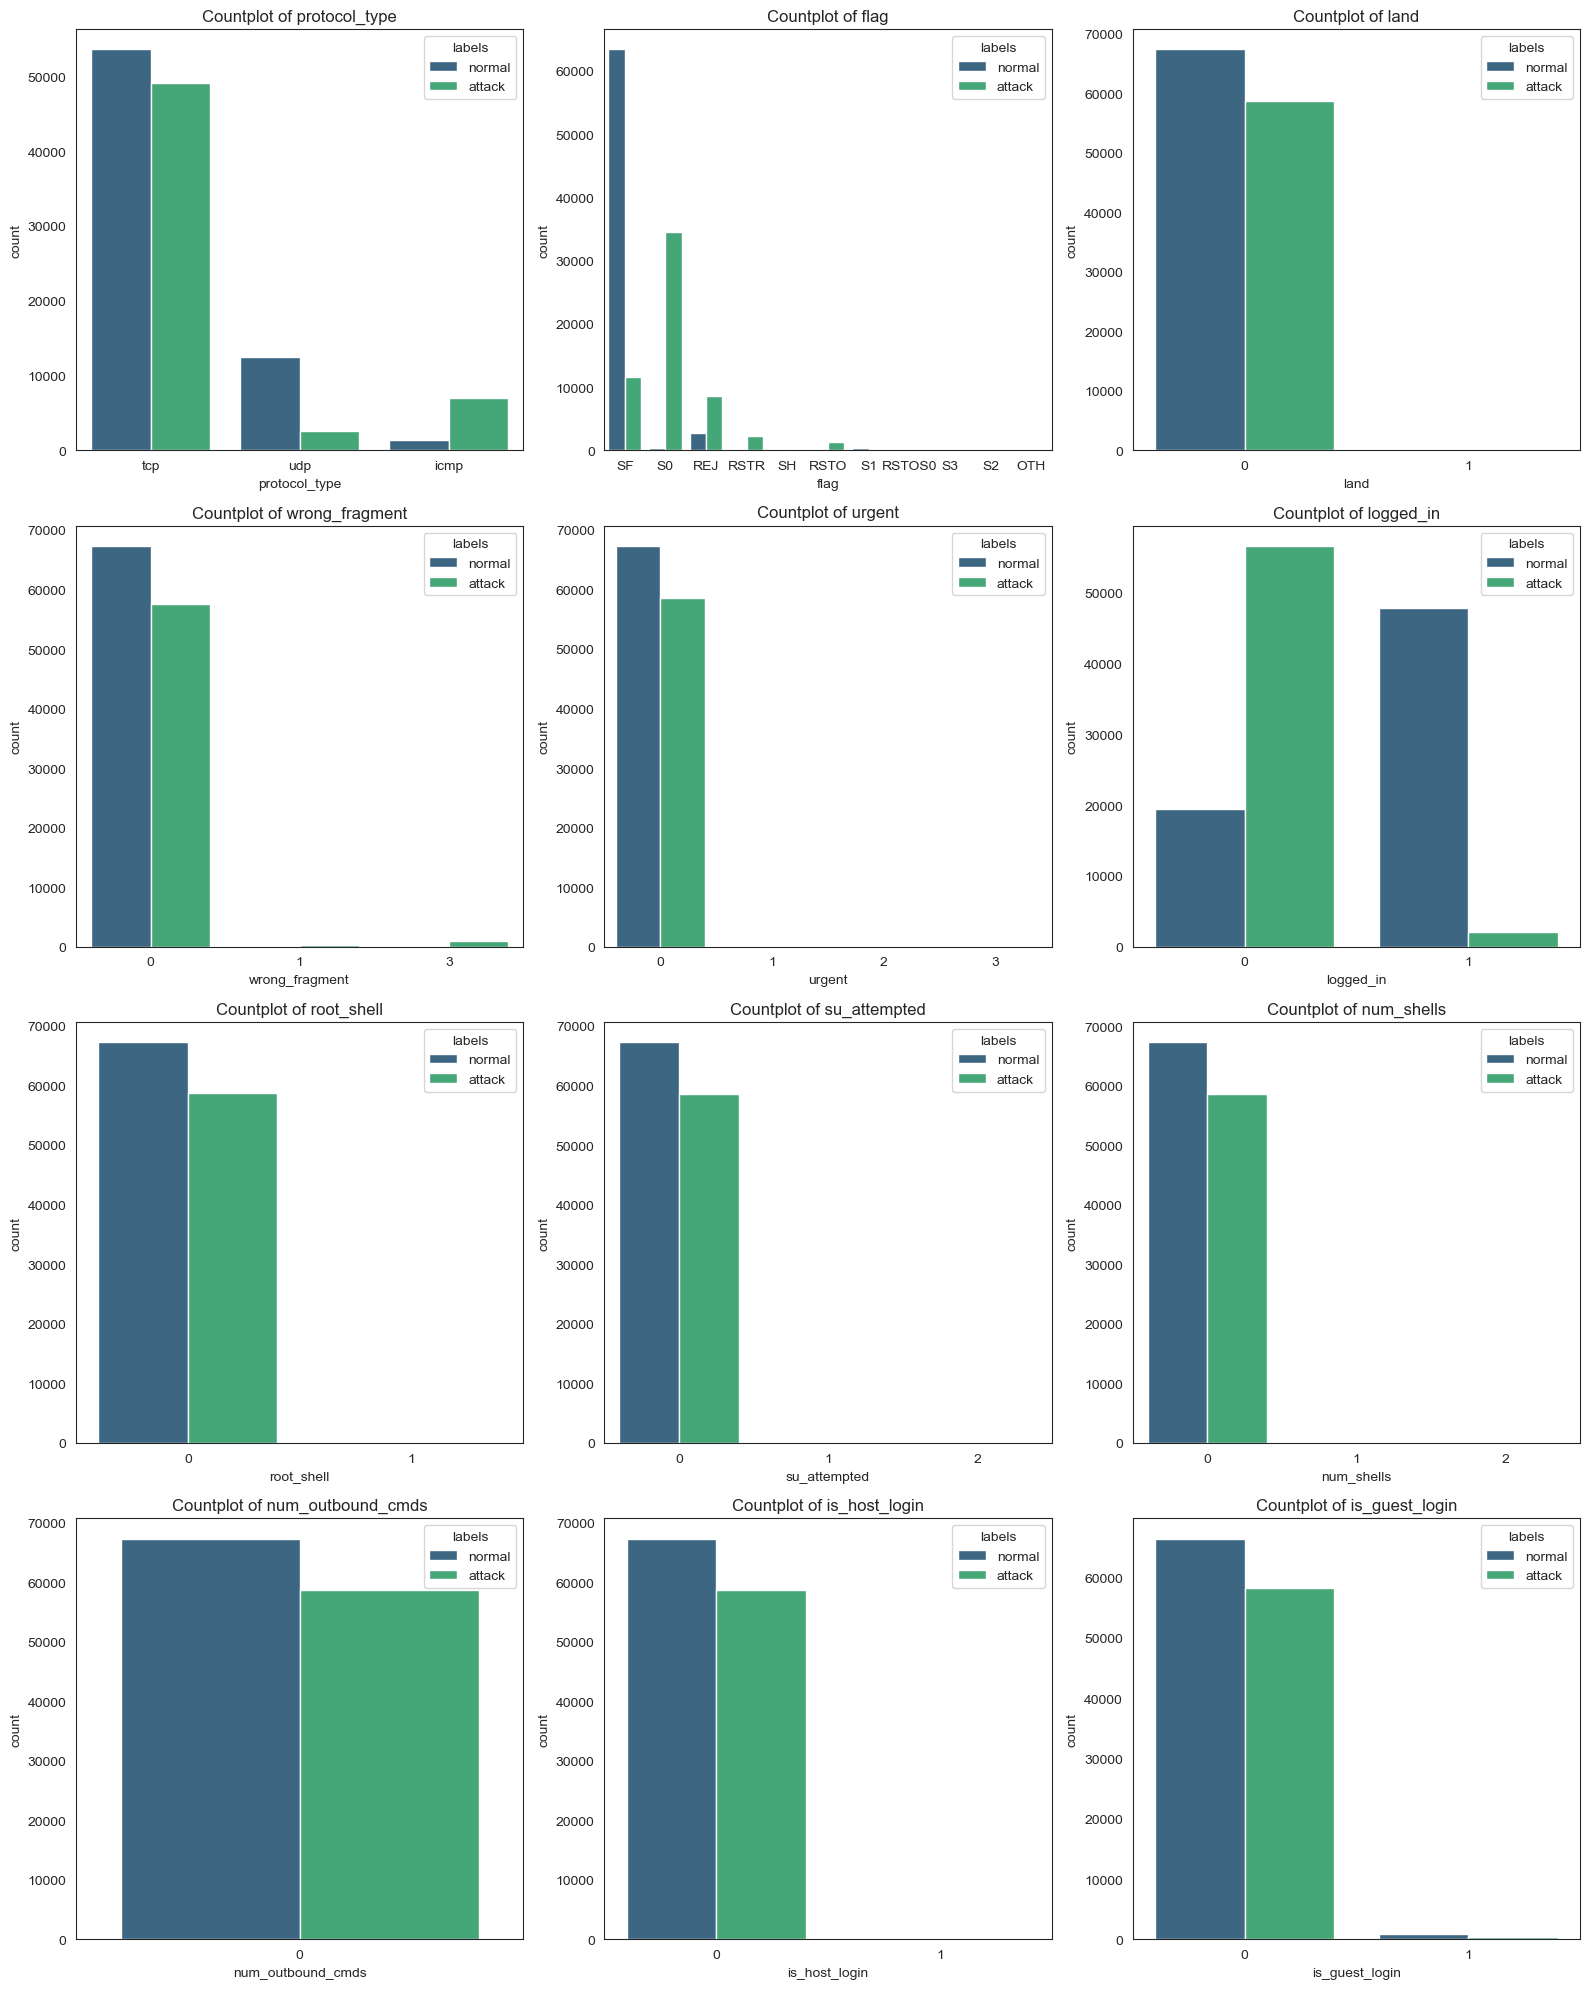

In [20]:
plot_count(train_df)

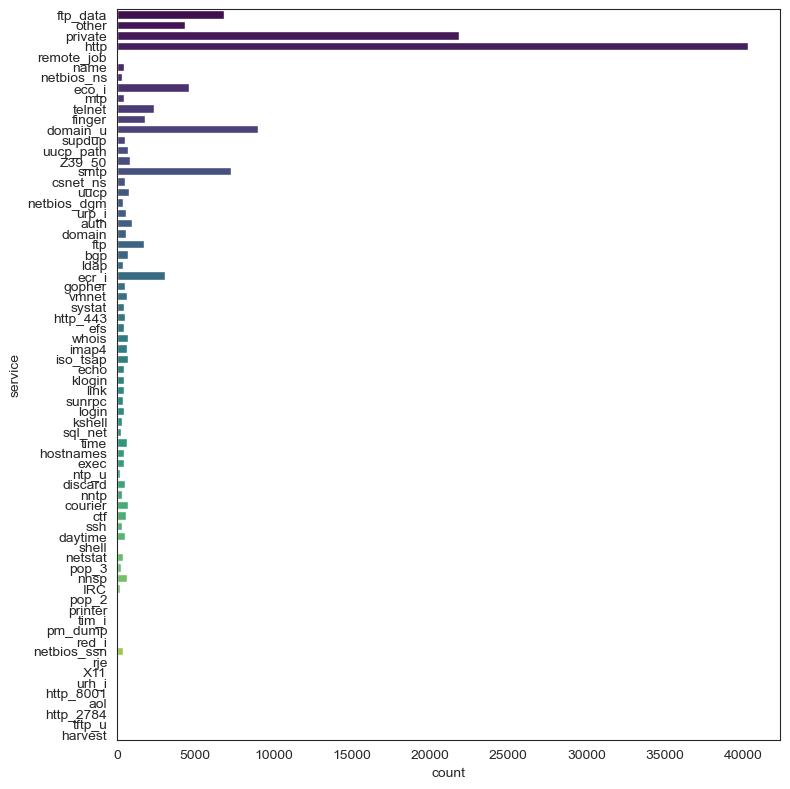

In [21]:
#service column
plt.figure(figsize=(8,8))
sns.countplot(y='service',data=train_df,palette='viridis')
plt.tight_layout()

##### correlational heatmap

<Axes: >

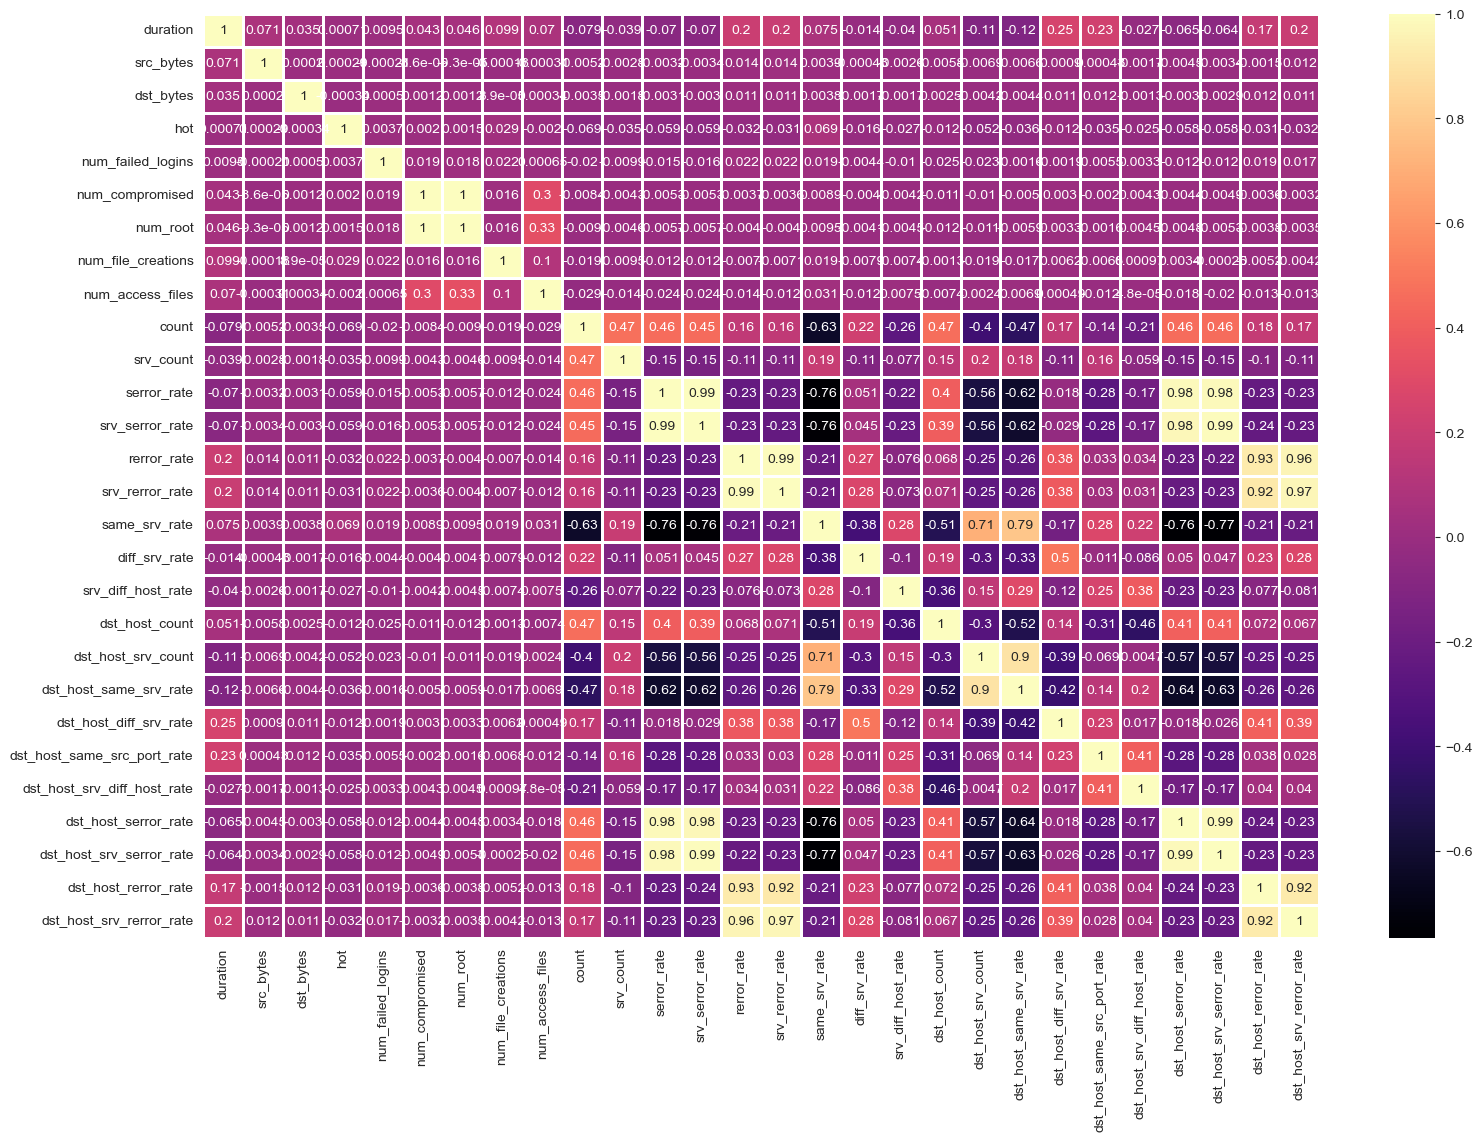

In [22]:
plt.figure(figsize=(18,12))
sns.heatmap(train_df[['duration','src_bytes','dst_bytes','hot','num_failed_logins','num_compromised','num_root','num_file_creations','num_access_files','count', 'srv_count', 'serror_rate',
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
           'dst_host_srv_count', 'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate',]].corr(),cmap='magma',linecolor='white',linewidths=2,annot=True)

#### correlation with the target column

In [23]:
#converting labels into numerical attack : 1,normal :0
train_df['labels'] = train_df['labels'].apply(lambda x : 1 if x=="attack" else 0)
test_df['labels'] = test_df['labels'].apply(lambda x :1 if x=="attack" else 0)

<Axes: >

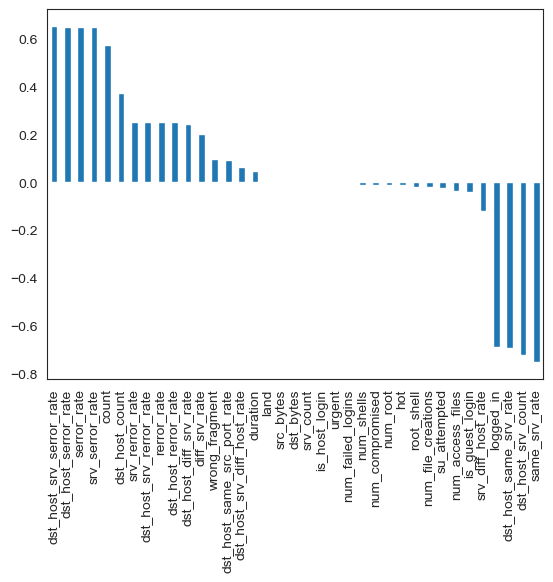

In [24]:
train_df.select_dtypes(include='number').corr()['labels'].drop(['num_outbound_cmds','labels']).sort_values(ascending=False).plot(kind='bar')

#### scaling numerical columns

In [25]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
train_df[num_cols] = st_sclr.fit_transform(train_df[num_cols])
#not assuming information about test set
test_df[num_cols] = st_sclr.transform(test_df[num_cols])

#### dropping land, urgent, wrong_fragment,num_outbound_cmds,is_host_login,num_shells,su_attempted,root_shell columns as they only contain one type of instances

In [26]:
train_df.drop(['root_shell','land','urgent','wrong_fragment','num_outbound_cmds','is_host_login','num_shells','su_attempted'],axis=1,inplace=True)
test_df.drop(['root_shell','land','urgent','wrong_fragment','num_outbound_cmds','is_host_login','num_shells','su_attempted'],axis=1,inplace=True)

#### Label encoding categorical columns

In [27]:
cat_cols_en = ['protocol_type','service','flag','logged_in','is_guest_login']
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
for col in cat_cols_en:
    train_df[col] = lbl_en.fit_transform(train_df[col])
    test_df[col] = lbl_en.fit_transform(test_df[col])

### feature selection using Light Gbm model

In [28]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,-0.110249,1,20,9,-0.007679,-0.004919,-0.095076,-0.027023,0,-0.011664,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0
1,-0.110249,2,44,9,-0.007737,-0.004919,-0.095076,-0.027023,0,-0.011664,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0
2,-0.110249,1,49,5,-0.007762,-0.004919,-0.095076,-0.027023,0,-0.011664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1
3,-0.110249,1,24,9,-0.007723,-0.002891,-0.095076,-0.027023,1,-0.011664,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0
4,-0.110249,1,24,9,-0.007728,-0.004814,-0.095076,-0.027023,1,-0.011664,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0


In [29]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,-0.108329,1,51,9,-0.007348,-0.004801,-0.095076,-0.027023,1,-0.011664,...,-0.529826,-0.916013,-0.333214,-0.447834,0.066252,-0.639532,-0.624871,2.450344,-0.376387,0
1,-0.110249,2,12,9,-0.007755,-0.004885,-0.095076,-0.027023,0,-0.011664,...,0.355431,0.620915,-0.333214,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0
2,-0.110249,2,12,9,-0.007755,-0.004899,-0.095076,-0.027023,0,-0.011664,...,1.258754,1.066401,-0.439078,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0
3,0.649588,2,41,9,-0.007738,-0.004893,-0.095076,-0.027023,0,-0.011664,...,-1.026654,-1.138756,4.007224,2.756092,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0
4,5.442437,1,41,4,-0.007762,-0.004919,-0.095076,-0.027023,0,-0.011664,...,-1.026654,-1.138756,3.160309,2.756092,-0.289103,-0.639532,-0.624871,2.874410,2.753914,1


### Splitting data

In [30]:
X_train = train_df.drop('labels',axis=1)
X_test = test_df.drop('labels',axis=1)
y_train = train_df['labels']
y_test = test_df['labels']
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [31]:
y_test.value_counts()

labels
1    11299
0    11245
Name: count, dtype: int64

### Training baseline models for feature selection

In [32]:
cat_ft = np.where(X_train.dtypes!='float')[0]

In [33]:
#catboost
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train,y_train,
           cat_ft,
           eval_set=(X_val,y_val),
           logging_level='Verbose',  # you can uncomment this for text output
           plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.099024
0:	learn: 0.4644793	test: 0.4650319	best: 0.4650319 (0)	total: 83ms	remaining: 1m 22s
1:	learn: 0.3299204	test: 0.3304058	best: 0.3304058 (1)	total: 103ms	remaining: 51.4s
2:	learn: 0.2369355	test: 0.2371055	best: 0.2371055 (2)	total: 125ms	remaining: 41.4s
3:	learn: 0.1905416	test: 0.1908959	best: 0.1908959 (3)	total: 145ms	remaining: 36.2s
4:	learn: 0.1360834	test: 0.1361228	best: 0.1361228 (4)	total: 166ms	remaining: 33s
5:	learn: 0.1121677	test: 0.1119135	best: 0.1119135 (5)	total: 187ms	remaining: 31s
6:	learn: 0.0903613	test: 0.0904160	best: 0.0904160 (6)	total: 210ms	remaining: 29.8s
7:	learn: 0.0712175	test: 0.0712579	best: 0.0712579 (7)	total: 232ms	remaining: 28.8s
8:	learn: 0.0613424	test: 0.0613170	best: 0.0613170 (8)	total: 252ms	remaining: 27.8s
9:	learn: 0.0535083	test: 0.0534505	best: 0.0534505 (9)	total: 270ms	remaining: 26.7s
10:	learn: 0.0487943	test: 0.0487498	best: 0.0487498 (10)	total: 286ms	remaining: 25.8s
11:	learn: 0.0430069	test:

97:	learn: 0.0060155	test: 0.0074180	best: 0.0074180 (96)	total: 1.9s	remaining: 17.5s
98:	learn: 0.0059068	test: 0.0073327	best: 0.0073327 (98)	total: 1.92s	remaining: 17.4s
99:	learn: 0.0058691	test: 0.0072846	best: 0.0072846 (99)	total: 1.94s	remaining: 17.4s
100:	learn: 0.0058473	test: 0.0072566	best: 0.0072566 (100)	total: 1.96s	remaining: 17.4s
101:	learn: 0.0058101	test: 0.0072401	best: 0.0072401 (101)	total: 1.98s	remaining: 17.4s
102:	learn: 0.0057001	test: 0.0071732	best: 0.0071732 (102)	total: 2s	remaining: 17.4s
103:	learn: 0.0056614	test: 0.0071366	best: 0.0071366 (103)	total: 2.02s	remaining: 17.4s
104:	learn: 0.0056571	test: 0.0071388	best: 0.0071366 (103)	total: 2.03s	remaining: 17.3s
105:	learn: 0.0056187	test: 0.0070818	best: 0.0070818 (105)	total: 2.05s	remaining: 17.3s
106:	learn: 0.0056186	test: 0.0070818	best: 0.0070818 (105)	total: 2.06s	remaining: 17.2s
107:	learn: 0.0056149	test: 0.0070809	best: 0.0070809 (107)	total: 2.07s	remaining: 17.1s
108:	learn: 0.005601

198:	learn: 0.0043531	test: 0.0060908	best: 0.0060908 (198)	total: 3.56s	remaining: 14.3s
199:	learn: 0.0043531	test: 0.0060909	best: 0.0060908 (198)	total: 3.58s	remaining: 14.3s
200:	learn: 0.0043531	test: 0.0060909	best: 0.0060908 (198)	total: 3.59s	remaining: 14.3s
201:	learn: 0.0043531	test: 0.0060909	best: 0.0060908 (198)	total: 3.6s	remaining: 14.2s
202:	learn: 0.0043521	test: 0.0060907	best: 0.0060907 (202)	total: 3.62s	remaining: 14.2s
203:	learn: 0.0043513	test: 0.0060906	best: 0.0060906 (203)	total: 3.63s	remaining: 14.2s
204:	learn: 0.0043504	test: 0.0060904	best: 0.0060904 (204)	total: 3.64s	remaining: 14.1s
205:	learn: 0.0043504	test: 0.0060904	best: 0.0060904 (204)	total: 3.66s	remaining: 14.1s
206:	learn: 0.0043502	test: 0.0060904	best: 0.0060904 (206)	total: 3.67s	remaining: 14.1s
207:	learn: 0.0043501	test: 0.0060905	best: 0.0060904 (206)	total: 3.69s	remaining: 14s
208:	learn: 0.0043494	test: 0.0060903	best: 0.0060903 (208)	total: 3.71s	remaining: 14s
209:	learn: 0.0

295:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.81s	remaining: 11.4s
296:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.83s	remaining: 11.4s
297:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.84s	remaining: 11.4s
298:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.85s	remaining: 11.4s
299:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.87s	remaining: 11.4s
300:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.88s	remaining: 11.3s
301:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.89s	remaining: 11.3s
302:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.9s	remaining: 11.3s
303:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.91s	remaining: 11.2s
304:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.92s	remaining: 11.2s
305:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 4.94s	remaining: 11.2s
306:	learn:

395:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.04s	remaining: 9.21s
396:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.05s	remaining: 9.19s
397:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.06s	remaining: 9.17s
398:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.07s	remaining: 9.15s
399:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.08s	remaining: 9.13s
400:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.1s	remaining: 9.11s
401:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.11s	remaining: 9.09s
402:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.12s	remaining: 9.06s
403:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.13s	remaining: 9.04s
404:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.14s	remaining: 9.02s
405:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 6.15s	remaining: 9s
406:	learn: 0.

498:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.27s	remaining: 7.3s
499:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.28s	remaining: 7.28s
500:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.29s	remaining: 7.26s
501:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.31s	remaining: 7.25s
502:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.32s	remaining: 7.23s
503:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.33s	remaining: 7.21s
504:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.34s	remaining: 7.2s
505:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.35s	remaining: 7.18s
506:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.36s	remaining: 7.16s
507:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.38s	remaining: 7.14s
508:	learn: 0.0042742	test: 0.0060486	best: 0.0060486 (248)	total: 7.39s	remaining: 7.13s
509:	learn: 

600:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (595)	total: 8.96s	remaining: 5.95s
601:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (601)	total: 8.98s	remaining: 5.94s
602:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (601)	total: 9s	remaining: 5.92s
603:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (601)	total: 9.01s	remaining: 5.91s
604:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (604)	total: 9.03s	remaining: 5.9s
605:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (605)	total: 9.05s	remaining: 5.88s
606:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (606)	total: 9.07s	remaining: 5.87s
607:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (607)	total: 9.08s	remaining: 5.86s
608:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (608)	total: 9.1s	remaining: 5.84s
609:	learn: 0.0036292	test: 0.0055490	best: 0.0055490 (609)	total: 9.12s	remaining: 5.83s
610:	learn: 0.0036291	test: 0.0055490	best: 0.0055490 (610)	total: 9.13s	remaining: 5.82s
611:	learn: 0.0

703:	learn: 0.0036288	test: 0.0055488	best: 0.0055488 (702)	total: 10.4s	remaining: 4.38s
704:	learn: 0.0036288	test: 0.0055488	best: 0.0055488 (704)	total: 10.4s	remaining: 4.37s
705:	learn: 0.0036288	test: 0.0055488	best: 0.0055488 (705)	total: 10.4s	remaining: 4.35s
706:	learn: 0.0036288	test: 0.0055488	best: 0.0055488 (706)	total: 10.5s	remaining: 4.33s
707:	learn: 0.0036288	test: 0.0055487	best: 0.0055487 (707)	total: 10.5s	remaining: 4.32s
708:	learn: 0.0036288	test: 0.0055487	best: 0.0055487 (707)	total: 10.5s	remaining: 4.3s
709:	learn: 0.0036288	test: 0.0055487	best: 0.0055487 (707)	total: 10.5s	remaining: 4.29s
710:	learn: 0.0036288	test: 0.0055487	best: 0.0055487 (710)	total: 10.5s	remaining: 4.27s
711:	learn: 0.0036288	test: 0.0055487	best: 0.0055487 (711)	total: 10.5s	remaining: 4.26s
712:	learn: 0.0036288	test: 0.0055487	best: 0.0055487 (712)	total: 10.5s	remaining: 4.24s
713:	learn: 0.0036288	test: 0.0055487	best: 0.0055487 (713)	total: 10.6s	remaining: 4.23s
714:	learn:

807:	learn: 0.0036284	test: 0.0055483	best: 0.0055483 (807)	total: 11.9s	remaining: 2.82s
808:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (808)	total: 11.9s	remaining: 2.81s
809:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (809)	total: 11.9s	remaining: 2.79s
810:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (810)	total: 11.9s	remaining: 2.78s
811:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (811)	total: 11.9s	remaining: 2.76s
812:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (812)	total: 11.9s	remaining: 2.75s
813:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (813)	total: 12s	remaining: 2.73s
814:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (814)	total: 12s	remaining: 2.72s
815:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (815)	total: 12s	remaining: 2.7s
816:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (816)	total: 12s	remaining: 2.69s
817:	learn: 0.0036284	test: 0.0055482	best: 0.0055482 (817)	total: 12s	remaining: 2.67s
818:	learn: 0.0036284

905:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.1s	remaining: 1.36s
906:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.1s	remaining: 1.34s
907:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.1s	remaining: 1.33s
908:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.1s	remaining: 1.32s
909:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.2s	remaining: 1.3s
910:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.2s	remaining: 1.29s
911:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.2s	remaining: 1.27s
912:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.2s	remaining: 1.26s
913:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.2s	remaining: 1.24s
914:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.2s	remaining: 1.23s
915:	learn: 0.0036280	test: 0.0055481	best: 0.0055480 (897)	total: 13.2s	remaining: 1.21s
916:	learn:

In [34]:
pred_cat = cat_clf.predict(X_test)
print(classification_report(y_test,pred_cat))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11245
           1       0.98      0.91      0.94     11299

    accuracy                           0.95     22544
   macro avg       0.95      0.95      0.95     22544
weighted avg       0.95      0.95      0.95     22544



In [35]:
cats = X_train.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    X_train[col] = X_train[col].astype("category")
import xgboost as xgb
from xgboost import XGBClassifier
xg_cl = XGBClassifier(enable_categorical=True)
xg_cl.fit(X_train, y_train)
pred_xgb = xg_cl.predict(X_test)
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11245
           1       0.99      0.88      0.93     11299

    accuracy                           0.93     22544
   macro avg       0.94      0.93      0.93     22544
weighted avg       0.94      0.93      0.93     22544



In [36]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train,y_train)
pred_lgb = lgb_clf.predict(X_test)
print(classification_report(y_test,pred_lgb))

[LightGBM] [Info] Number of positive: 46913, number of negative: 53865
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3132
[LightGBM] [Info] Number of data points in the train set: 100778, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465508 -> initscore=-0.138186
[LightGBM] [Info] Start training from score -0.138186
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     11245
           1       0.99      0.87      0.92     11299

    accuracy                           0.93     22544
   macro avg       0.94      0.93      0.93     22544
weighted avg       0.94      0.93      0.93     22544



### All baseline models perform the same taking average of feature importance score

In [37]:
cat_importance = cat_clf.feature_importances_
xgb_importance = xg_cl.feature_importances_
lgb_importance = lgb_clf.feature_importances_

In [38]:
average_importace = np.mean([cat_importance,xgb_importance,lgb_importance],axis=0)

In [39]:
feature_df = pd.DataFrame(average_importace,columns=['importance'],index=cat_clf.feature_names_)

In [40]:
feature_df

,importance
duration,51.777552
protocol_type,44.000520
service,96.154250
flag,22.375955
src_bytes,172.378393
dst_bytes,69.767413
hot,29.541951
num_failed_logins,0.685492
logged_in,13.219415
num_compromised,7.213271


<Axes: >

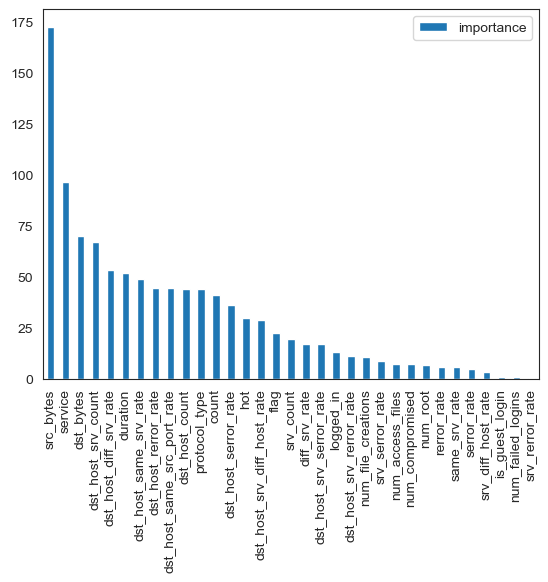

In [41]:
feature_df.sort_values(ascending=False,by='importance').plot(kind='bar')

In [42]:
feature_df['importance'].describe()

count     33.000000
mean      31.323232
std       34.702827
min        0.350116
25%        7.213271
50%       19.530324
75%       44.377926
max      172.378393
Name: importance, dtype: float64

#### Removing columns which are in last 25% quartile range

In [43]:
quart_25_col = ['num_failed_logins','num_root','num_access_files','is_guest_login','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate']
mod_train_df = train_df.drop(quart_25_col,axis=1)
mod_test_df = test_df.drop(quart_25_col,axis=1)

In [44]:
X_train_mod = mod_train_df.drop('labels',axis=1)
X_test_mod = mod_test_df.drop('labels',axis=1)
y_train_mod = mod_train_df['labels']
y_test_mod = mod_test_df['labels']
from sklearn.model_selection import train_test_split
X_train_mod,X_val_mod,y_train_mod,y_val_mod = train_test_split(X_train_mod,y_train_mod,test_size=0.2)

### Training Models on modified data

#### Catboost Model

In [45]:
cat_ft = np.where(X_train_mod.dtypes!='float')[0]
parameters = {
    'iterations': 500,                
    'learning_rate': 0.01,               
    'depth': 8,                         
    'l2_leaf_reg': 2,                   
    'bagging_temperature': 1.0,         # Controls intensity of Bayesian bagging
    'border_count': 254,                # Number of splits for numerical features         # Indices of categorical features in the input data
    'thread_count': 8,                  # Number of parallel threads used for training
    'random_seed': 42,                  # Seed for random number generator for reproducibility
    'loss_function': 'Logloss',         # Loss function to optimize during training
    'eval_metric': 'AUC',               # Metric used for evaluation
    'custom_metric': ['Accuracy', 'AUC'], # Additional metrics to be evaluated during training
    'use_best_model': True,            
    'od_type': 'Iter',                  
    'verbose': True              
}

In [46]:
from catboost import CatBoostClassifier
cat_clf_mod = CatBoostClassifier(**parameters)

In [47]:
cat_clf_mod.fit(X_train_mod, y_train_mod,
    cat_features=cat_ft,
    eval_set=(X_val_mod, y_val_mod),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9965211	best: 0.9965211 (0)	total: 28.8ms	remaining: 14.4s
1:	test: 0.9976756	best: 0.9976756 (1)	total: 56.4ms	remaining: 14s
2:	test: 0.9984006	best: 0.9984006 (2)	total: 82.2ms	remaining: 13.6s
3:	test: 0.9986706	best: 0.9986706 (3)	total: 110ms	remaining: 13.7s
4:	test: 0.9988083	best: 0.9988083 (4)	total: 137ms	remaining: 13.6s
5:	test: 0.9989520	best: 0.9989520 (5)	total: 163ms	remaining: 13.4s
6:	test: 0.9990254	best: 0.9990254 (6)	total: 187ms	remaining: 13.2s
7:	test: 0.9991760	best: 0.9991760 (7)	total: 213ms	remaining: 13.1s
8:	test: 0.9992157	best: 0.9992157 (8)	total: 237ms	remaining: 12.9s
9:	test: 0.9992875	best: 0.9992875 (9)	total: 260ms	remaining: 12.7s
10:	test: 0.9992962	best: 0.9992962 (10)	total: 285ms	remaining: 12.6s
11:	test: 0.9993614	best: 0.9993614 (11)	total: 310ms	remaining: 12.6s
12:	test: 0.9994171	best: 0.9994171 (12)	total: 336ms	remaining: 12.6s
13:	test: 0.9994221	best: 0.9994221 (13)	total: 358ms	remaining: 12.4s
14:	test: 0.9994375	best:

120:	test: 0.9998282	best: 0.9998282 (120)	total: 3.01s	remaining: 9.43s
121:	test: 0.9998288	best: 0.9998288 (121)	total: 3.03s	remaining: 9.4s
122:	test: 0.9998304	best: 0.9998304 (122)	total: 3.06s	remaining: 9.38s
123:	test: 0.9998314	best: 0.9998314 (123)	total: 3.08s	remaining: 9.34s
124:	test: 0.9998341	best: 0.9998341 (124)	total: 3.1s	remaining: 9.31s
125:	test: 0.9998355	best: 0.9998355 (125)	total: 3.13s	remaining: 9.28s
126:	test: 0.9998352	best: 0.9998355 (125)	total: 3.15s	remaining: 9.25s
127:	test: 0.9998354	best: 0.9998355 (125)	total: 3.17s	remaining: 9.22s
128:	test: 0.9998357	best: 0.9998357 (128)	total: 3.2s	remaining: 9.19s
129:	test: 0.9998372	best: 0.9998372 (129)	total: 3.22s	remaining: 9.16s
130:	test: 0.9998387	best: 0.9998387 (130)	total: 3.24s	remaining: 9.13s
131:	test: 0.9998392	best: 0.9998392 (131)	total: 3.27s	remaining: 9.1s
132:	test: 0.9998406	best: 0.9998406 (132)	total: 3.29s	remaining: 9.07s
133:	test: 0.9998413	best: 0.9998413 (133)	total: 3.31s

237:	test: 0.9999015	best: 0.9999019 (235)	total: 6.04s	remaining: 6.65s
238:	test: 0.9999020	best: 0.9999020 (238)	total: 6.08s	remaining: 6.63s
239:	test: 0.9999024	best: 0.9999024 (239)	total: 6.11s	remaining: 6.62s
240:	test: 0.9999026	best: 0.9999026 (240)	total: 6.14s	remaining: 6.6s
241:	test: 0.9999031	best: 0.9999031 (241)	total: 6.17s	remaining: 6.58s
242:	test: 0.9999034	best: 0.9999034 (242)	total: 6.2s	remaining: 6.56s
243:	test: 0.9999035	best: 0.9999035 (243)	total: 6.24s	remaining: 6.55s
244:	test: 0.9999041	best: 0.9999041 (244)	total: 6.27s	remaining: 6.53s
245:	test: 0.9999044	best: 0.9999044 (245)	total: 6.3s	remaining: 6.51s
246:	test: 0.9999048	best: 0.9999048 (246)	total: 6.33s	remaining: 6.49s
247:	test: 0.9999051	best: 0.9999051 (247)	total: 6.36s	remaining: 6.47s
248:	test: 0.9999053	best: 0.9999053 (248)	total: 6.39s	remaining: 6.44s
249:	test: 0.9999061	best: 0.9999061 (249)	total: 6.42s	remaining: 6.42s
250:	test: 0.9999063	best: 0.9999063 (250)	total: 6.45

354:	test: 0.9999325	best: 0.9999325 (354)	total: 9.3s	remaining: 3.8s
355:	test: 0.9999331	best: 0.9999331 (355)	total: 9.33s	remaining: 3.77s
356:	test: 0.9999332	best: 0.9999332 (356)	total: 9.36s	remaining: 3.75s
357:	test: 0.9999331	best: 0.9999332 (356)	total: 9.38s	remaining: 3.72s
358:	test: 0.9999333	best: 0.9999333 (358)	total: 9.41s	remaining: 3.69s
359:	test: 0.9999336	best: 0.9999336 (359)	total: 9.43s	remaining: 3.67s
360:	test: 0.9999337	best: 0.9999337 (360)	total: 9.45s	remaining: 3.64s
361:	test: 0.9999337	best: 0.9999337 (361)	total: 9.48s	remaining: 3.61s
362:	test: 0.9999338	best: 0.9999338 (362)	total: 9.5s	remaining: 3.59s
363:	test: 0.9999340	best: 0.9999340 (363)	total: 9.53s	remaining: 3.56s
364:	test: 0.9999337	best: 0.9999340 (363)	total: 9.55s	remaining: 3.53s
365:	test: 0.9999337	best: 0.9999340 (363)	total: 9.58s	remaining: 3.51s
366:	test: 0.9999340	best: 0.9999340 (366)	total: 9.61s	remaining: 3.48s
367:	test: 0.9999341	best: 0.9999341 (367)	total: 9.64

467:	test: 0.9999480	best: 0.9999480 (467)	total: 12.3s	remaining: 840ms
468:	test: 0.9999481	best: 0.9999481 (468)	total: 12.3s	remaining: 814ms
469:	test: 0.9999482	best: 0.9999482 (469)	total: 12.3s	remaining: 787ms
470:	test: 0.9999485	best: 0.9999485 (470)	total: 12.4s	remaining: 761ms
471:	test: 0.9999487	best: 0.9999487 (471)	total: 12.4s	remaining: 735ms
472:	test: 0.9999487	best: 0.9999487 (472)	total: 12.4s	remaining: 708ms
473:	test: 0.9999487	best: 0.9999487 (473)	total: 12.4s	remaining: 682ms
474:	test: 0.9999489	best: 0.9999489 (474)	total: 12.5s	remaining: 656ms
475:	test: 0.9999490	best: 0.9999490 (475)	total: 12.5s	remaining: 630ms
476:	test: 0.9999492	best: 0.9999492 (476)	total: 12.5s	remaining: 603ms
477:	test: 0.9999492	best: 0.9999492 (477)	total: 12.5s	remaining: 577ms
478:	test: 0.9999491	best: 0.9999492 (477)	total: 12.6s	remaining: 551ms
479:	test: 0.9999491	best: 0.9999492 (477)	total: 12.6s	remaining: 525ms
480:	test: 0.9999492	best: 0.9999492 (477)	total: 1

In [48]:
pred_cat = cat_clf_mod.predict(X_test_mod)
print(classification_report(y_test_mod,pred_cat))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11245
           1       0.98      0.91      0.94     11299

    accuracy                           0.95     22544
   macro avg       0.95      0.95      0.95     22544
weighted avg       0.95      0.95      0.95     22544



### Light GBM 

In [75]:
params = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'binary',          # Changed objective to binary
    'metric': 'binary_logloss',     # Changed metric to binary_logloss
    'sub_feature': 0.8,             # colsample_bytree
    'num_leaves': 40,
    'min_child_samples': 100,        # min_data_in_leaf
    'n_estimators': 200,
    'max_depth': 30
}
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(**params)
lgbm.fit(X_train_mod,y_train_mod,sample_weight=sample_weights)
pred_lgbm = lgbm.predict(X_test_mod)
print(classification_report(y_test,pred_lgbm))


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 46887, number of negative: 53891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2724
[LightGBM] [Info] Number of data points in the train set: 100778, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466298 -> initscore=-0.135013
[LightGBM] [Info] Start training from score -0.135013
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8


### XGboost

In [79]:
params_xgb = {
    "tree_method": "auto",
    "n_estimators": 1000,
    "learning_rate": 0.05,
    "max_depth": 7,
    "min_child_weight": 1,
    "subsample": 1.0,
    "colsample_bytree": 1.0,
    "gamma": 2,
    "reg_lambda": 1,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "random_state": 0,
}
cats = X_train.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    X[col] = X[col].astype("category")
import xgboost as xgb
from xgboost import XGBClassifier
xg_cl = XGBClassifier(**params_xgb, enable_categorical=True)
xg_cl.fit(X_train_mod, y_train_mod,sample_weight=sample_weights)
pred_xgb = xg_cl.predict(X_test_mod)
print(classification_report(y_test_mod,pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11245
           1       0.99      0.88      0.93     11299

    accuracy                           0.94     22544
   macro avg       0.94      0.94      0.94     22544
weighted avg       0.94      0.94      0.94     22544



In [78]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight={0: 5, 1: 1.0}, y=y_train)

In [82]:
from sklearn.ensemble import VotingClassifier
models = [("cat",cat_clf),
          ("xgb",xg_cl),
          ("lgbm",lgbm),]
voting_clf = VotingClassifier(models,voting='soft',n_jobs=-1)
voting_clf.fit(X_train_mod,y_train_mod)

Learning rate set to 0.073854
0:	learn: 0.5304463	total: 65.5ms	remaining: 1m 5s
1:	learn: 0.4209541	total: 72.2ms	remaining: 36s
2:	learn: 0.3041927	total: 79.3ms	remaining: 26.3s
3:	learn: 0.2296210	total: 86.1ms	remaining: 21.4s
4:	learn: 0.1791449	total: 93.4ms	remaining: 18.6s
5:	learn: 0.1443644	total: 100ms	remaining: 16.6s
6:	learn: 0.1139720	total: 108ms	remaining: 15.3s
7:	learn: 0.1037643	total: 115ms	remaining: 14.2s
8:	learn: 0.0919843	total: 122ms	remaining: 13.4s
9:	learn: 0.0809463	total: 131ms	remaining: 13s
10:	learn: 0.0719313	total: 142ms	remaining: 12.8s
11:	learn: 0.0646037	total: 155ms	remaining: 12.8s
12:	learn: 0.0592451	total: 167ms	remaining: 12.7s
13:	learn: 0.0544781	total: 176ms	remaining: 12.4s
14:	learn: 0.0505227	total: 184ms	remaining: 12.1s
15:	learn: 0.0481782	total: 191ms	remaining: 11.8s
16:	learn: 0.0452680	total: 199ms	remaining: 11.5s
17:	learn: 0.0421671	total: 207ms	remaining: 11.3s
18:	learn: 0.0396654	total: 215ms	remaining: 11.1s
19:	learn:

317:	learn: 0.0041409	total: 2.46s	remaining: 5.28s
318:	learn: 0.0041409	total: 2.47s	remaining: 5.27s
319:	learn: 0.0041409	total: 2.48s	remaining: 5.26s
320:	learn: 0.0041409	total: 2.48s	remaining: 5.25s
321:	learn: 0.0041409	total: 2.49s	remaining: 5.24s
322:	learn: 0.0041409	total: 2.49s	remaining: 5.22s
323:	learn: 0.0041409	total: 2.5s	remaining: 5.21s
324:	learn: 0.0041409	total: 2.5s	remaining: 5.2s
325:	learn: 0.0041409	total: 2.51s	remaining: 5.19s
326:	learn: 0.0041409	total: 2.52s	remaining: 5.18s
327:	learn: 0.0041409	total: 2.52s	remaining: 5.17s
328:	learn: 0.0041409	total: 2.53s	remaining: 5.15s
329:	learn: 0.0041409	total: 2.53s	remaining: 5.14s
330:	learn: 0.0041409	total: 2.54s	remaining: 5.13s
331:	learn: 0.0041409	total: 2.54s	remaining: 5.12s
332:	learn: 0.0041409	total: 2.55s	remaining: 5.11s
333:	learn: 0.0041409	total: 2.56s	remaining: 5.1s
334:	learn: 0.0041409	total: 2.56s	remaining: 5.09s
335:	learn: 0.0041409	total: 2.57s	remaining: 5.08s
336:	learn: 0.00

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x2fd703c50>),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=True,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=2,
                                            grow_policy=None...
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=0, ...)),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.01, max_depth=30,
                                             metric='binary_logloss',
                                             min_child_samples=100,
                                             n_estimators=200, num_leaves=40,
                                             objective='binary',
                                             sub_feature=0.8))],
                 n_jobs=-1, voting='soft')

In [83]:
voting_pred = voting_clf.predict(X_test_mod)
print(classification_report(y_test_mod,voting_pred))

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11245
           1       0.99      0.87      0.93     11299

    accuracy                           0.93     22544
   macro avg       0.94      0.93      0.93     22544
weighted avg       0.94      0.93      0.93     22544

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 46913, number of negative: 53865
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009405 seconds.
You can set `force_row_wise=true` to remove the overhead.

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.8. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 46887, number of negative: 53891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2724
[LightGBM] [Info] Number of data points in the train set: 100778, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465250 -> initscore=-0.139223
[LightGBM] [Info] Start training from score -0.139223
633:	learn: 0.0041409	total: 4.08s	remaining: 2.35s
634:	learn: 0.0041409	total: 4.08s	remaining: 2.35s
635:	learn: 0.0041409	total: 4.08s	remainin